In [ ]:
!pip install kafka-python==2.0.2
!pip install matplotlib
!pip install cmcrameri

In [ ]:
from google.colab import drive
import os
import pandas as pd

In [ ]:
!curl -sSOL https://downloads.apache.org/kafka/3.6.1/kafka_2.12-3.6.1.tgz

In [ ]:
!tar -xzf kafka_2.12-3.6.1.tgz

In [ ]:
!./kafka_2.12-3.6.1/bin/zookeeper-server-start.sh -daemon ./kafka_2.12-3.6.1/config/zookeeper.properties
!./kafka_2.12-3.6.1/bin/kafka-server-start.sh -daemon ./kafka_2.12-3.6.1/config/server.properties
!echo "Waiting for 10 secs until kafka and zookeeper services are up and running"
!sleep 10

Waiting for 10 secs until kafka and zookeeper services are up and running


In [ ]:
!ps -ef | grep kafka

root        1433     197  0 01:43 ?        00:00:00 /bin/bash -c ps -ef | grep kafka
root        1435    1433  0 01:43 ?        00:00:00 grep kafka


### Creación de 16 tópicos
Cada tópico corresponde a 1 canal, el archivo hltau_completo_uv.csv contiene 16 canales.

In [ ]:
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic c0
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic c1
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic c2
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic c3
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic c4
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic c5
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic c6
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic c7
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic c8
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic c9
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic c10
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic c11
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic c12
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic c13
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic c14
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic c15

Created topic c0.
Created topic c1.
Created topic c2.
Created topic c3.
Created topic c4.
Created topic c5.
Created topic c6.
Created topic c7.
Created topic c8.
Created topic c9.
Created topic c10.
Created topic c11.
Created topic c12.
Created topic c13.
Created topic c14.
Created topic c15.


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
vis_df = pd.read_csv('drive/MyDrive/hltau_completo_uv.csv')
vis_df = vis_df.drop(vis_df.columns[2], axis=1) # Drop w column
vis_df.tail()

,-2245.512935,-625.275579,0.019848,-0.009888,12065070.000000,224749993984.000000,0
3196370,-49.627602,28.421167,0.811038,0.068833,11467541.0,2.417500e+11,13
3196371,-49.627602,28.421167,0.764876,0.124828,11166644.0,2.422500e+11,14
3196372,-49.627602,28.421167,0.784313,0.060222,11467541.0,2.422500e+11,14
3196373,-49.627602,28.421167,0.767079,0.140298,11166644.0,2.427500e+11,15
3196374,-49.627602,28.421167,0.808210,0.059672,11467541.0,2.427500e+11,15


### Creación del Productor
Se crea la función *write_to_kafka* para enviar las visibilidades a cada tópico que le corresponda dependiendo de su canal espectral.

In [ ]:
from kafka import KafkaProducer
producer = KafkaProducer(bootstrap_servers=['127.0.0.1:9092'])
def error_callback(exc):
    raise Exception('Error while sendig data to kafka: {0}'.format(str(exc)))

def write_to_kafka(df):
  cont = 0
  for index, row in df.iterrows():
    if cont % 300000 == 0:
      print("Writing line ",cont)
    c = row.iloc[-1]
    topic = f"c{int(c)}"
    value = ';'.join(map(str, row.iloc[:-1])).encode('utf-8')
    producer.send(topic, value).add_errback(error_callback)
    cont+=1

In [ ]:
write_to_kafka(vis_df)

Writing line  0
Writing line  300000
Writing line  600000
Writing line  900000
Writing line  1200000
Writing line  1500000
Writing line  1800000
Writing line  2100000
Writing line  2400000
Writing line  2700000
Writing line  3000000


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget https://downloads.apache.org/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz
!tar -xvf spark-3.5.0-bin-hadoop3.tgz
!pip install findspark

In [ ]:
!curl -fL https://github.com/coursier/coursier/releases/latest/download/cs-x86_64-pc-linux.gz | gzip -d > cs && chmod +x cs && ./cs setup -y

In [ ]:
os.environ['PATH'] += ":/root/.local/share/coursier/bin"

In [ ]:
!cs install scala:2.12.18 && cs install scalac:2.12.18

In [ ]:
!wget "https://repo1.maven.org/maven2/org/apache/spark/spark-streaming-kafka-0-10-assembly_2.12/3.5.0/spark-streaming-kafka-0-10-assembly_2.12-3.5.0.jar"

In [ ]:
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.0-bin-hadoop3"
os.environ['PYSPARK_SUBMIT_ARGS'] = '--jars /content/spark-streaming-kafka-0-10-assembly_2.12-3.5.0.jar pyspark-shell'

In [ ]:
import findspark
findspark.init()
import pyspark
from pyspark.ml.feature import Normalizer, StandardScaler
from pyspark.streaming import StreamingContext
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from uuid import uuid1
import time
import random
import numpy as np
import sys

In [ ]:
scala_version = '2.12'
spark_version = '3.5.0'
# TODO: Ensure match above values match the correct versions
packages = [
    f'org.apache.spark:spark-sql-kafka-0-10_{scala_version}:{spark_version}',
    'org.apache.kafka:kafka-clients:3.6.1'
]
spark = SparkSession.builder\
   .master("local")\
   .appName("kafka-example")\
   .config("spark.jars.packages", ",".join(packages))\
   .getOrCreate()
spark.sparkContext.setLogLevel("WARN")

In [ ]:
def readFromKafka(spark, topics):
  return spark.readStream \
  .format("kafka") \
  .option("kafka.bootstrap.servers", "localhost:9092") \
  .option("subscribe", topics) \
  .option("startingOffsets", "earliest") \
  .option("failOnDataLoss", False) \
  .load()

### Lectura del Productor, Suscripción a los tópicos
Se lee de los 16 tópicos producidos 1 solo productor por Kafka.

In [ ]:
query_df = readFromKafka(spark, "c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15")
query_df.printSchema()

root
 |-- key: binary (nullable = true)
 |-- value: binary (nullable = true)
 |-- topic: string (nullable = true)
 |-- partition: integer (nullable = true)
 |-- offset: long (nullable = true)
 |-- timestamp: timestamp (nullable = true)
 |-- timestampType: integer (nullable = true)



In [ ]:
ql = spark.readStream \
  .format("kafka") \
  .option("kafka.bootstrap.servers", "localhost:9092") \
  .option("subscribe", "c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15") \
  .option("startingOffsets", "earliest") \
  .option("failOnDataLoss", False) \
  .load()

### Procesamiento

#### 1. Gridding
Una vez leído los datos del productor se utiliza sentencias SQL para crear nuevas columnas "ik", "jk" y la última que corrresponde a la casilla que corresponde la visibilidad en un arreglo N * N indexado dado por:

```
grid = ik * N + jk
```

Luego cada fila del dataframe tendrá 4 atributos/columnas, correspondiente a cada visibilidad *(con valores de ejemplo)*.

| grid | sum_r | sum_i | sum_w |
| --- | --- | --- | --- |
| 2175953 | 9.671548E-4 | 9.671548E-4 |9.671548E-4

Se declaran los datos del problema como la velocidad de la luz, deltaX, el largo y ancho de la imagen, y se calcula deltaU | deltaV.

In [ ]:
LIGHT_SPEED = 299792458
N = 2048
dim = N * N
deltaX = 0.003

def arcsec_to_rad(degree): return degree * np.pi / (180 * 3600)

deltaU = 1 / (N * arcsec_to_rad(deltaX));
deltaV = deltaU;

In [ ]:
ql2 = ql.selectExpr(
    "FLOAT(SPLIT_PART(value, ';', 1)) AS u",
    "FLOAT(SPLIT_PART(value, ';', 2)) AS v",
    "FLOAT(SPLIT_PART(value, ';', 3)) AS vr",
    "FLOAT(SPLIT_PART(value, ';', 4)) AS vi",
    "FLOAT(SPLIT_PART(value, ';', 5)) AS w",
    "FLOAT(SPLIT_PART(value, ';', 6)) AS fq",
    f"ROUND(u * (fq / {LIGHT_SPEED}) / {deltaU}) + ({N} / 2) AS ik",
    f"ROUND(v * (fq / {LIGHT_SPEED}) / {deltaU}) + ({N} / 2) AS jk",
    "(vr * w) AS rw",
    "(vi * w) AS iw",
    f"INT(ik * {N} + jk) AS grid",
    "current_timestamp() AS timestamp") \
    .withWatermark("timestamp", "0 minutes") \
    .groupBy("grid", "timestamp").agg(
    sum("rw").alias("real_sum"),
    sum("iw").alias("imag_sum"),
    sum("w").alias("weight_sum")
)

#### 2. Normalización
Luego de realizar el gridding se procede a normalizar de acuerdo al peso de cada visibilidad, obtiendo solamente 2 columnas correspondiente a la parte real e imaginaria *(con valores de ejemplo)*.

| grid | sum_r | sum_i |
| --- | --- | --- |
| 2175953 | 9.671548E-4 | 9.671548E-4

In [ ]:
ql3 = ql2.selectExpr("grid","FLOAT(real_sum / weight_sum) AS real_sum", "FLOAT(imag_sum / weight_sum) AS imag_sum")

### DataFrame Visualization
Se realiza una query con **memory sink** para visualizar si el dataframe es correcto.

In [ ]:
ql3.writeStream \
    .queryName("visualization_query") \
    .outputMode("append") \
    .format("memory") \
    .start()

In [ ]:
display(spark.sql('SELECT * FROM visualization_query').show())

+-------+-------------+-------------+
|   grid|     real_sum|     imag_sum|
+-------+-------------+-------------+
|1948579| 0.0073035206|-0.0053121666|
|2433953|-0.0079972325| -0.005971539|
|1928133|-0.0015598717|-0.0010445904|
|2085823| 0.0053142747| -0.012579264|
|1821792|-0.0010543843| 0.0029633732|
|2157472| 8.0721616E-4| -7.033619E-4|
|1676209| -0.007227591|-0.0045444644|
|1870874| 0.0034026126|  0.004502504|
|2081866|  3.618326E-4|-0.0018787566|
|2167737| 0.0022578726| 0.0053795082|
|1897372|   0.00950922| -8.406148E-4|
|1889172|  0.015598439|  0.005654083|
|1590194|-0.0023983575|-0.0047438154|
|2118608| -0.018425934| 0.0040535983|
|2245585| 0.0047409395| 0.0014251514|
|1868850| 0.0018483518| 4.4504192E-4|
|2405281|-0.0022772162|-0.0020673885|
|2161593| 0.0020555968| -0.004742806|
|2120634|-0.0056137545| -0.001993344|
|2323489| 5.2440097E-4|  0.005725001|
+-------+-------------+-------------+
only showing top 20 rows



None

### File Sink
Se vacía el contenido del dataframe reducido en un .csv, dado por las 3 columnas casilla(grid), parte real(sum_r) y parte imaginaria (sum_i)

In [ ]:
ql3.writeStream\
   .format("csv")\
   .trigger(processingTime="10 seconds")\
   .option("checkpointLocation", "checkpoint/")\
   .option("path", "output_path/")\
   .outputMode("append")\
   .start()\
   .awaitTermination()

#### Merge de los .csv generados
Se junta todos los archivos .csv generados, al estar en un entorno distribuido. Y se genera un solo archivo en la carpeta ./complete_csv/

In [ ]:
allfiles =  spark.read.option("header","false").csv("./output_path/part-*.csv")
allfiles.coalesce(1).write.format("csv").option("header", "false").save("complete.csv")

### Image Visualization

In [ ]:
cs = pd.read_csv("./complete.csv/part-00000-47a6845a-7dd3-47f6-b231-9cd4924c7968-c000.csv")
cs.columns = ['id', 'real', 'imag']
cs

,id,real,imag
0,1897529,0.011655,-0.001970
1,1674219,-0.000845,0.001997
2,1975175,-0.002441,-0.002044
3,2053264,0.005103,-0.017625
4,1844274,0.002467,-0.000329
...,...,...,...
57702,2057123,-0.004562,-0.003543
57703,2231327,0.007247,-0.009655
57704,2044875,-0.021634,0.014270
57705,2585592,0.003263,-0.004416


Se puede ver que son 57708 filas o puntos en la matriz grideados, esto es comparado con múltiples pruebas y resultados de compañeros, todos llegamos a lo mismo por lo tanto se confirma que toda la información es procesada correctamente.

In [ ]:
t_r=np.zeros((N, N), dtype=np.complex64)
t_i=np.zeros((N, N), dtype=np.complex64)

ix = np.unravel_index(cs.id, (N, N))[0]
jx = np.unravel_index(cs.id, (N, N))[1]

real = np.array(cs.real)
img = np.array(cs.imag)

for i in range(len(ix)):
    t_r[ix[i]][jx[i]] = real[i]
    t_i[ix[i]][jx[i]] = img[i]

gridded = t_r + 1j * t_i

Text(0.5, 1.0, 'Dirty image')

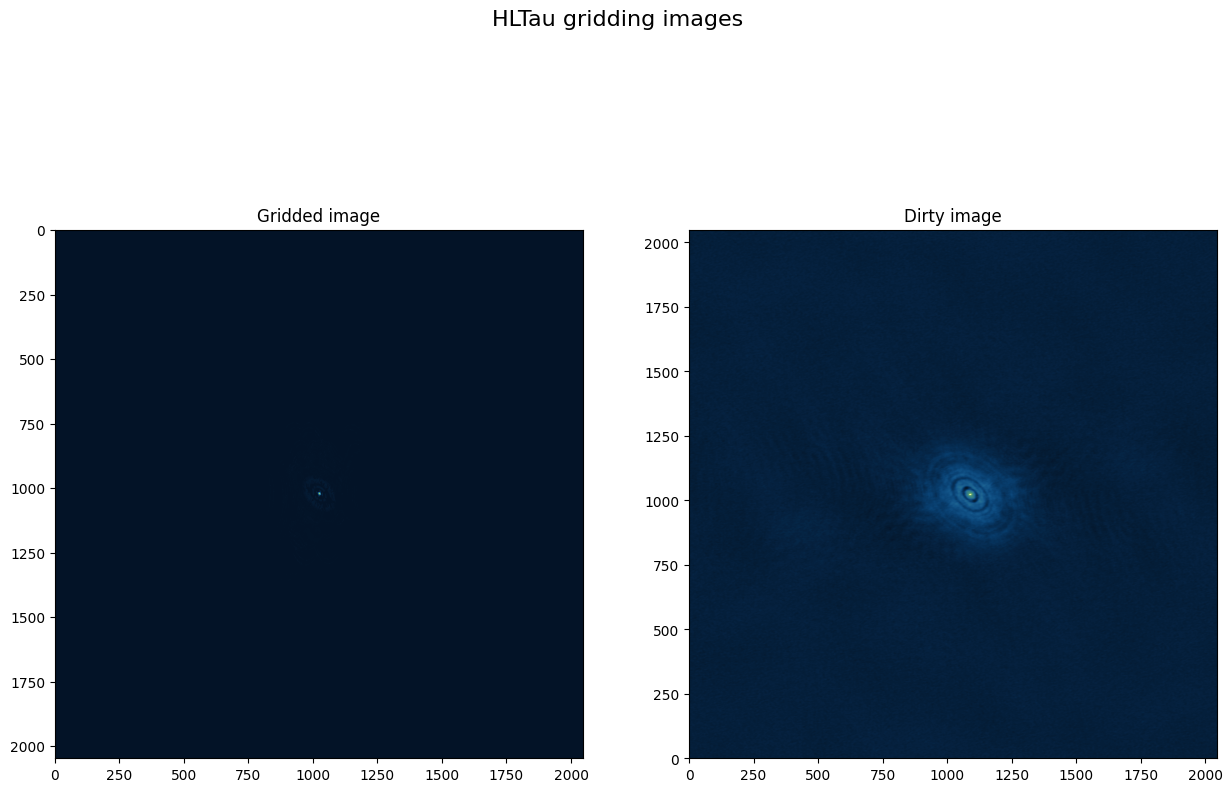

In [ ]:
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc

image = np.fft.ifftshift(np.fft.fft2(np.fft.fftshift(gridded)))
fig , ax = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
ax[0].imshow(np.abs(gridded), cmap=cmc.navia)
ax[1].imshow(image.real,origin ="lower", cmap=cmc.navia)

fig.suptitle('HLTau gridding images', fontsize=16)
ax[0].set_title("Gridded image")
ax[1].set_title("Dirty image")

## Notas
Notar que es posible realizar tanto el gridding y la normalización en un solo bloque, de **writeStream** pero no se vería de manera ordenada, como se ve a continuación, es interesante notar que la solución propuesta permite realizar cálculos/expresiones complejas en poco espacio, en *streaming* y obtenter el mismo resultado.

In [ ]:
ql.selectExpr(
    "FLOAT(SPLIT_PART(value, ';', 1)) AS u",
    "FLOAT(SPLIT_PART(value, ';', 2)) AS v",
    "FLOAT(SPLIT_PART(value, ';', 3)) AS vr",
    "FLOAT(SPLIT_PART(value, ';', 4)) AS vi",
    "FLOAT(SPLIT_PART(value, ';', 5)) AS w",
    "FLOAT(SPLIT_PART(value, ';', 6)) AS fq",
    "ROUND(u * (fq / 299792458) / 33571.773438) + (2048 / 2) AS ik",
    "ROUND(v * (fq / 299792458) / 33571.773438) + (2048 / 2) AS jk",
    "FLOAT(vr) * FLOAT(w) AS r",
    "FLOAT(vi) * FLOAT(w) AS i",
    "INT(ik * 2048 + jk) AS GRID",
    "current_timestamp() AS timestamp") \
    .withWatermark("timestamp", "0 minutes") \
    .groupBy("GRID", "timestamp").agg(
    sum("r").alias("sum_r"),
    sum("i").alias("sum_i"),
    sum("w").alias("sum_w"))\
    .selectExpr("GRID","FLOAT(sum_r / sum_w) AS sum_r", "FLOAT(sum_i / sum_w) AS sum_i")\
    .writeStream\
    .format("parquet")\
    .outputMode("append")\
    .option("path", "path/to/destination/dir")\
    .option("checkpointLocation", "/path/to/checkpoint/dir")\
    .start()\
    .awaitTermination()